# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Chrome()

url = "https://etherscan.io/txs"

driver.get(url)

In [3]:
def extract_html_content(driver):
    body = driver.find_element(By.TAG_NAME,"tbody")
    html_content=body.get_attribute("innerHTML")
    soup = BeautifulSoup(html_content, "html.parser")
    return soup.find_all("tr")

In [4]:
def extract_attributes(item):
    return {
            "txn Hash": item.find("span", class_="hash-tag").text.strip(),
            "Method": item.find("span", class_="badge").text.strip(),
            "Block": item.find_all("td")[3].text.strip(),
            "Age": item.find("td", class_="showAge").text.strip(),
            "Sender": item.find_all("td")[7].text.strip(),
            "Receiver": item.find_all("td")[9].text.strip(),
            "Value": item.find_all("td")[10].text.strip(),
            "Txn Fee": item.find_all("td", class_="small text-muted showTxnFee")[0].text.strip()
    }

In [5]:
all_data = []
page_number=0
while(page_number<50):
    tr=extract_html_content(driver)
    for item in tr:    
        all_data.append(extract_attributes(item))
    next_page = driver.find_element(By.XPATH, '//a[@class="page-link px-3" and @aria-label="Next"]')  
    next_page.click()
    page_number+=1

df = pd.DataFrame(all_data)
driver.close()


In [6]:
first_10_blocks = df["Block"].drop_duplicates().head(10)
filtered_df = df[df["Block"].isin(first_10_blocks)].drop_duplicates(subset="txn Hash", keep="first")
filtered_df.describe()

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee
count,1413,1413,1413,1413,1413,1413,1413,1413
unique,1413,140,10,15,1079,764,636,1008
top,0xfc722ee5ab5bc681ce7d09a7bed917f6578092fc934e...,Transfer,19399482,1 min ago,MEXC: Mexc.com,Uniswap: Universal Router,0 ETH,0.0014694
freq,1,832,272,385,26,160,654,23


In [7]:
backup_df = filtered_df.copy(deep=True)
filtered_df.dtypes

txn Hash    object
Method      object
Block       object
Age         object
Sender      object
Receiver    object
Value       object
Txn Fee     object
dtype: object

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [8]:
def print_unique_elements(df, column_name):
    try:
        unique_counts = df[column_name].value_counts()
        i = 0 
        for value, count in unique_counts.items():
            i = i + 1 
            print(f"{i} : {value} Count: {count}")
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")

In [9]:
print_unique_elements(filtered_df,"Block")

1 : 19399482 Count: 272
2 : 19399477 Count: 248
3 : 19399479 Count: 174
4 : 19399475 Count: 174
5 : 19399480 Count: 132
6 : 19399478 Count: 129
7 : 19399481 Count: 110
8 : 19399474 Count: 108
9 : 19399476 Count: 55
10 : 19399483 Count: 11


In [10]:
filtered_df["Txn Fee"] = filtered_df["Txn Fee"].astype(float)
filtered_df.dropna(inplace = True , subset = ["Txn Fee"])
print_unique_elements(filtered_df,"Txn Fee")

1 : 0.0014694 Count: 23
2 : 0.00146873 Count: 21
3 : 0.001722 Count: 20
4 : 0.00148297 Count: 20
5 : 0.00130086 Count: 19
6 : 0.00152196 Count: 19
7 : 0.00153302 Count: 18
8 : 0.00144997 Count: 13
9 : 0.00151204 Count: 12
10 : 0.00132731 Count: 12
11 : 0.0014658 Count: 12
12 : 0.00132728 Count: 11
13 : 0.00156394 Count: 10
14 : 0.00144099 Count: 10
15 : 0.00146197 Count: 9
16 : 0.001449 Count: 8
17 : 0.00155402 Count: 7
18 : 0.00270186 Count: 7
19 : 0.00136835 Count: 6
20 : 0.001533 Count: 6
21 : 0.00139492 Count: 6
22 : 0.00144942 Count: 6
23 : 0.00125985 Count: 6
24 : 0.00251761 Count: 6
25 : 0.00251688 Count: 6
26 : 0.00144199 Count: 5
27 : 0.00144773 Count: 5
28 : 0.002847 Count: 5
29 : 0.0015229 Count: 5
30 : 0.0015114 Count: 5
31 : 0.00281011 Count: 4
32 : 0.00138477 Count: 4
33 : 0.001428 Count: 4
34 : 0.00134064 Count: 4
35 : 0.00151298 Count: 4
36 : 0.001365 Count: 4
37 : 0.00142897 Count: 4
38 : 0.00158509 Count: 4
39 : 0.00303424 Count: 4
40 : 0.00152291 Count: 4
41 : 0.0015

In [11]:
print_unique_elements(filtered_df,"Value")

1 : 0 ETH Count: 654
2 : 0.05 ETH Count: 14
3 : 0.5 ETH Count: 13
4 : 0.2 ETH Count: 9
5 : 1 ETH Count: 9
6 : 0.01 ETH Count: 9
7 : 0.15 ETH Count: 7
8 : 0.1 ETH Count: 7
9 : 2 ETH Count: 6
10 : 0.3 ETH Count: 5
11 : 0.08 ETH Count: 5
12 : 0.25 ETH Count: 4
13 : 0.16 ETH Count: 4
14 : 0.07 ETH Count: 4
15 : 0.03 ETH Count: 3
16 : 0.6 ETH Count: 3
17 : 0.25633467 ETH Count: 3
18 : 0.153800802 ETH Count: 3
19 : 0.06 ETH Count: 3
20 : 0.027 ETH Count: 3
21 : 0.4 ETH Count: 3
22 : 0.04 ETH Count: 3
23 : 0.02 ETH Count: 3
24 : 0.79 ETH Count: 2
25 : 0.13 ETH Count: 2
26 : 0.004096054 ETH Count: 2
27 : 0.0225 ETH Count: 2
28 : 0.22 ETH Count: 2
29 : 0.017 ETH Count: 2
30 : 0.12 ETH Count: 2
31 : 0.14 ETH Count: 2
32 : 1.13 ETH Count: 2
33 : 0.0513 ETH Count: 2
34 : 0.035 ETH Count: 2
35 : 0.0624 ETH Count: 2
36 : 0.230701203 ETH Count: 2
37 : 0.128167335 ETH Count: 2
38 : 0.026 ETH Count: 2
39 : 0.004405362 ETH Count: 2
40 : 0.257 ETH Count: 2
41 : 53 wei Count: 2
42 : 0.008645678 ETH Count:

In [12]:
def convert_to_eth(value):
    try:
        if "wei" in value:
            wei_value = float(value.replace(" wei", ""))
            eth_value = wei_value / 1e18 
        else:
            eth_value = float(value.replace(" ETH", ""))
        return eth_value
    except ValueError:
        return np.nan

filtered_df['Value'] = filtered_df['Value'].apply(convert_to_eth)
filtered_df = filtered_df[filtered_df['Value'] != 0]
filtered_df.dropna(inplace = True , subset = ["Value"])
print_unique_elements(filtered_df,"Value")

1 : 0.05 Count: 14
2 : 0.5 Count: 13
3 : 0.2 Count: 9
4 : 0.01 Count: 9
5 : 1.0 Count: 9
6 : 0.15 Count: 7
7 : 0.1 Count: 7
8 : 2.0 Count: 6
9 : 0.3 Count: 5
10 : 0.08 Count: 5
11 : 0.25 Count: 4
12 : 0.07 Count: 4
13 : 0.16 Count: 4
14 : 0.06 Count: 3
15 : 0.04 Count: 3
16 : 0.03 Count: 3
17 : 0.6 Count: 3
18 : 0.25633467 Count: 3
19 : 0.153800802 Count: 3
20 : 0.027 Count: 3
21 : 0.4 Count: 3
22 : 0.02 Count: 3
23 : 0.12 Count: 2
24 : 0.14 Count: 2
25 : 0.22 Count: 2
26 : 5.3e-17 Count: 2
27 : 0.004405362 Count: 2
28 : 0.0513 Count: 2
29 : 0.13 Count: 2
30 : 0.79 Count: 2
31 : 0.017 Count: 2
32 : 0.0225 Count: 2
33 : 0.004096054 Count: 2
34 : 1.13 Count: 2
35 : 0.0145 Count: 2
36 : 0.0624 Count: 2
37 : 0.257 Count: 2
38 : 0.035 Count: 2
39 : 0.128167335 Count: 2
40 : 0.008645678 Count: 2
41 : 0.35 Count: 2
42 : 0.230701203 Count: 2
43 : 0.076900401 Count: 2
44 : 7.0 Count: 2
45 : 0.026 Count: 2
46 : 0.003506792 Count: 1
47 : 0.272833486 Count: 1
48 : 1.01555577 Count: 1
49 : 0.043015

In [13]:
Q1 = filtered_df['Value'].quantile(0.25)
Q3 = filtered_df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = filtered_df[(filtered_df['Value'] < lower_threshold) | (filtered_df['Value'] > upper_threshold)]

filtered_df = filtered_df.drop(outliers.index)

filtered_df.reset_index(drop=True, inplace=True)



In [14]:
def calculate_mean_and_std(df, column_name):
    try:
        column_mean = df[column_name].mean()
        column_std = df[column_name].std()
        return column_mean, column_std
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return np.nan, np.nan

In [15]:
mean_value, std_value = calculate_mean_and_std(filtered_df, "Value")
mean_fee, std_fee = calculate_mean_and_std(filtered_df, "Txn Fee")
print(f"Value mean = {mean_value} \nValue std = {std_value} \nfee mean = {mean_fee} \nfee std = {std_fee}")

Value mean = 0.12531914208895706 
Value std = 0.15697104494401365 
fee mean = 0.004819778450920246 
fee std = 0.017208758993713793


In [16]:
from scipy.stats import norm

def plot_histogram_and_kde(df, column_name , bins_count):
    try:
        
        df[column_name].plot(kind='hist', bins=bins_count, density=True, alpha=0.5, label='Histogram')
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()

        x_values = np.linspace(df[column_name].min(),df[column_name].max(), 1000)
        y_values = norm.pdf(x_values, mean_value, std_value)

        plt.plot(x_values, y_values, color='red', label='Gaussian KDE')

        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.title(f"Distribution of {column_name} with Gaussian KDE", fontsize=14)
        plt.legend()  
        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_box_plot(df, column_name):
    try:
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.xlabel(column_name)
        plt.title(f"Box Plot: {column_name}")
        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_scatter(df, x_column, y_column):
    try:
        plt.scatter(df[x_column], df[y_column], alpha=0.5, color='purple')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f"Scatter Plot: {x_column} vs. {y_column}")
        plt.show()
    except KeyError:
        print(f"Column '{x_column}' or '{y_column}' not found in the DataFrame.")
        
def plot_violin(df , column_name):
    plt.violinplot(dataset=df[column_name], vert=False)
    plt.title(f"{column_name} violinplot")
    plt.show()

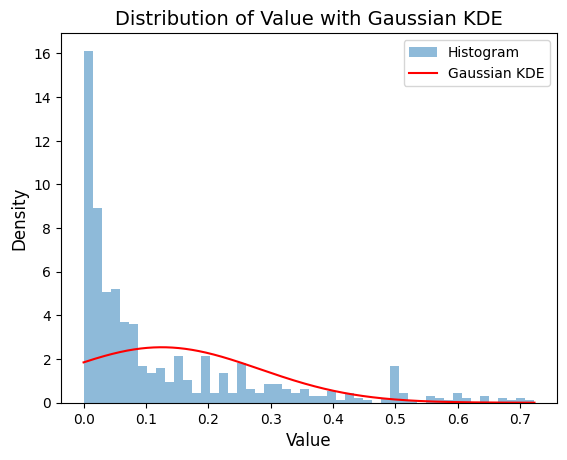

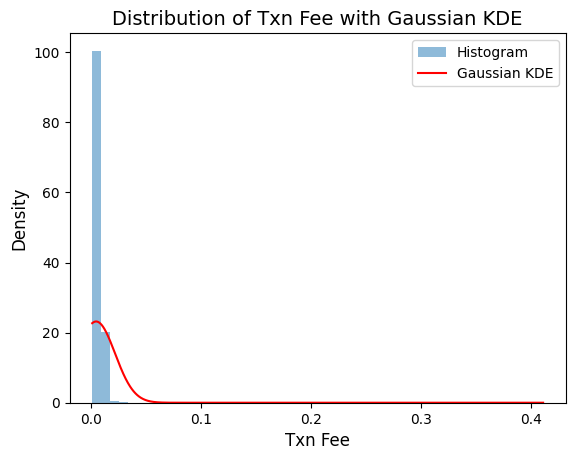

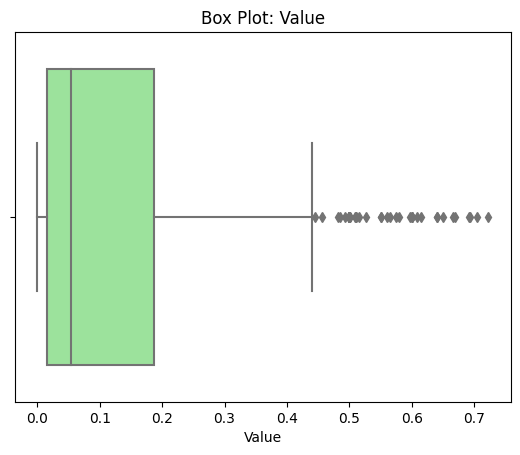

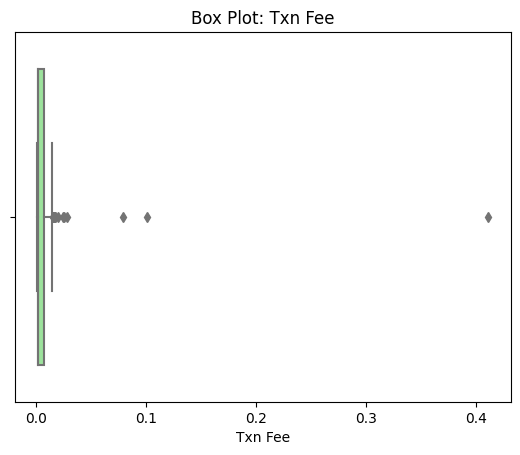

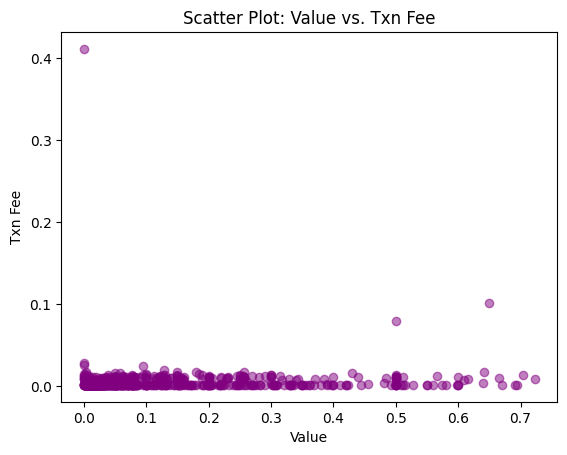

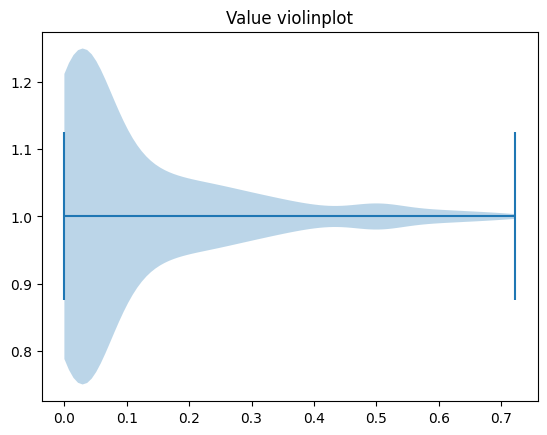

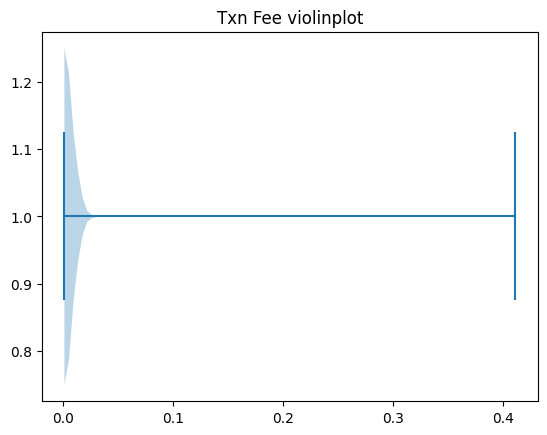

In [17]:
plot_histogram_and_kde(filtered_df , "Value" , 50)
plot_histogram_and_kde(filtered_df , "Txn Fee" , 50)
plot_box_plot(filtered_df , "Value")
plot_box_plot(filtered_df , "Txn Fee")
plot_scatter(filtered_df , "Value" , "Txn Fee")
plot_violin(filtered_df , "Value" )
plot_violin(filtered_df , "Txn Fee" )

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

In [40]:
sample_size = max(30, int(filtered_df.shape[0] * 0.1))
sample_size

65

In [41]:
simple_random_sample=filtered_df.sample(n=sample_size)
simple_random_sample

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee,strata
504,0x093843d98b7f127a9532f8246f50e132493210ca4b27...,Transfer,19399475,2 mins ago,Faith Builder,0xD6E4aA93...da06F9cEf,0.030976,0.001942,1
228,0xaf2566090584de689ee1a227033cd6bd53414639dc1a...,Transfer,19399480,1 min ago,Coinbase 13,0x044707Bc...51C3BAc23,0.001243,0.001533,0
160,0xc5721133abfff2ee1c4bcba1f7491b2a6074eecfc856...,Multicall,19399481,36 secs ago,0xb3382eC9...FC3C7eC46,Uniswap V3: Router 2,0.328263,0.008055,4
53,0x7d49584f7d83cca08104c3295451dbaf24143dc189d8...,Transfer,19399482,12 secs ago,0x84dc5182...4BEC0099D,0x58e0fbd1...A52bCf8Af,0.076895,0.001393,2
506,0x4a7c31059ea1a5bee6f8852bd8d4086b1203b18ed153...,Sell To Uniswap,19399475,2 mins ago,0xFEdceA93...8A4ED7182,0x: Exchange Proxy,0.115351,0.008314,3
...,...,...,...,...,...,...,...,...,...
613,0x7d1214c27f80b06c2a5ce75a03267a0d20af43b85603...,Transfer,19399474,3 mins ago,0x32738B54...D58c55E39,Coinbase 10,0.009502,0.001466,0
73,0x581fbdf331b18ceea91340accf67bea004b5cf874dc4...,Transfer,19399482,12 secs ago,0x1415eaC1...610bbf180,Orbiter Finance: Bridge,0.500700,0.001333,4
465,0xf0f20162622a0242f379ad5cb43db50c1306d5069ccf...,Transfer,19399477,2 mins ago,FixedFloat,0x62BE3108...a9f5b667E,0.019880,0.001470,1
356,0x810460c96b897d70aab70642b4cf927a7b5573f02622...,Transfer,19399478,1 min ago,0xa3e30292...3Eb33f380,0xbaD6B296...815d0d61f,0.005126,0.001403,0


In [42]:
def stratified_sampling(df, column_name, sample_size):
    df['strata'] = pd.qcut(df[column_name], q=5, labels=False)

    stratum_sizes = df.groupby('strata').size()

    sampled_df = pd.DataFrame()

    for stratum, size in stratum_sizes.items():
        stratum_sample_size = int(size / len(df) * sample_size)

        stratum_sample = df[df['strata'] == stratum].sample(stratum_sample_size)

        sampled_df = pd.concat([sampled_df, stratum_sample]) 

    sampled_df.drop(columns=['strata'], inplace=True)

    return sampled_df

In [44]:
stratified_sample = stratified_sampling(filtered_df, "Value" , sample_size)
stratified_sample

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee
530,0xf68343fed913c9cbdfb44066bf374fe2eb8d2b12d8a8...,Transfer,19399475,2 mins ago,Coinbase 5,0x81ad6065...1A5bF6994,0.005061,0.001469
159,0x68c287af0ed99486826c7229ac4a937bb61d411fcac0...,Transfer,19399481,36 secs ago,0xbd5CdD1c...8c32a473F,0x3215E847...6b51c0301,0.007705,0.001448
354,0xf388995528e32634097388cbf64bad7a1263f452c05a...,Transfer,19399478,1 min ago,Bybit: Hot Wallet,0x977e12D6...c71688A1E,0.010127,0.001395
356,0x810460c96b897d70aab70642b4cf927a7b5573f02622...,Transfer,19399478,1 min ago,0xa3e30292...3Eb33f380,0xbaD6B296...815d0d61f,0.005126,0.001403
580,0x927d832afc193d288a606f99f41a74403fec9ac19a09...,0x1333db9d,19399475,3 mins ago,0x1113eFd5...113707F80,MEV Bot: 0x000...1d3,0.000002,0.008889
...,...,...,...,...,...,...,...,...
149,0x3bd27cf80982cd2ef9fce2713c79dd100c193f10129b...,Execute,19399482,22 secs ago,0x7d315eC6...75f335fAa,Uniswap: Universal Router,0.704338,0.012848
156,0x77af29a3c66c4968c1f3b0860e17263a179832998d07...,Transfer,19399481,36 secs ago,0x9F422c38...602C7077F,0x2f671a39...e3D4C69f4,0.261071,0.001448
615,0xbe2811434e9528bf011972f2c8e4842838206dbc71d9...,Transfer,19399474,3 mins ago,0xCf8a3690...4BaABc38b,Coinbase 10,0.328553,0.001466
16,0x49c036603356bca16a0f31b60f1ea9f08431723d3571...,Transfer,19399479,11 secs ago,0x98832105...Aa0ac84d7,0xeEa8639d...15Acf6ee5,0.380000,0.001522


In [45]:
mean_simple_value, std_simple_value = calculate_mean_and_std(simple_random_sample,"Value")
mean_simple_fee, std_simple_fee = calculate_mean_and_std(simple_random_sample,"Txn Fee")
print(f"mean for simple random sampling : for Value = {mean_simple_value} | for Txn Fee = {mean_simple_fee} ")
print(f"std for simple random sampling : for Value = {std_simple_value} | for Txn Fee = {std_simple_fee} ")

mean for simple random sampling : for Value = 0.09304410449230768 | for Txn Fee = 0.0029831052307692308 
std for simple random sampling : for Value = 0.13922920356862828 | for Txn Fee = 0.0030730735127846294 


In [46]:
mean_strata_value, std_strata_value = calculate_mean_and_std(stratified_sample,"Value")
mean_strata_fee, std_strata_fee = calculate_mean_and_std(stratified_sample,"Txn Fee")
print(f"mean for stratified sampling : for Value = {mean_strata_value} | for Txn Fee = {mean_strata_fee} ")
print(f"std for stratified sampling : for Value = {std_strata_value} | for Txn Fee = {std_strata_fee} ")

mean for stratified sampling : for Value = 0.13367598698412697 | for Txn Fee = 0.004437110317460317 
std for stratified sampling : for Value = 0.17819262819098702 | for Txn Fee = 0.004425690949353219 


# Random Sampling

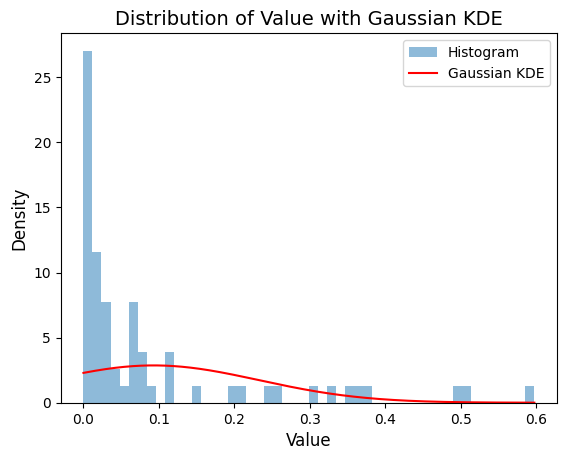

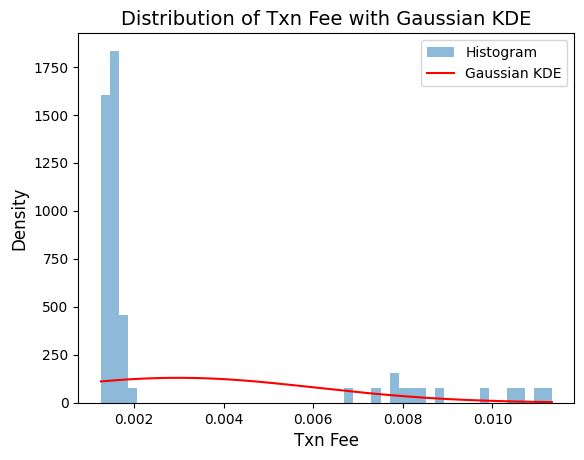

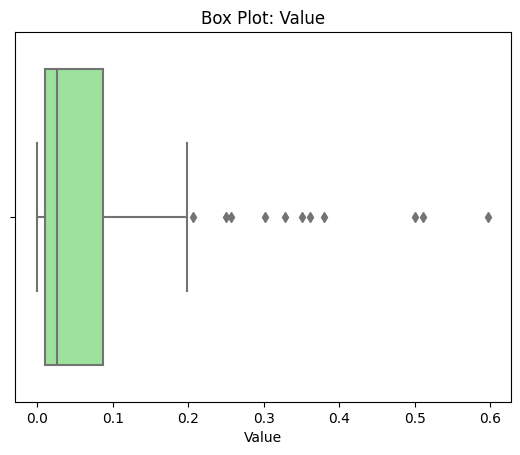

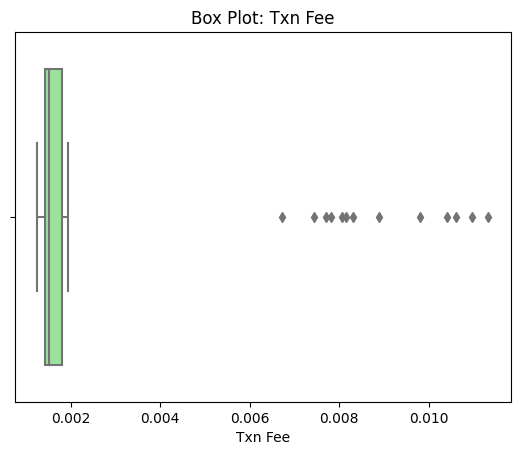

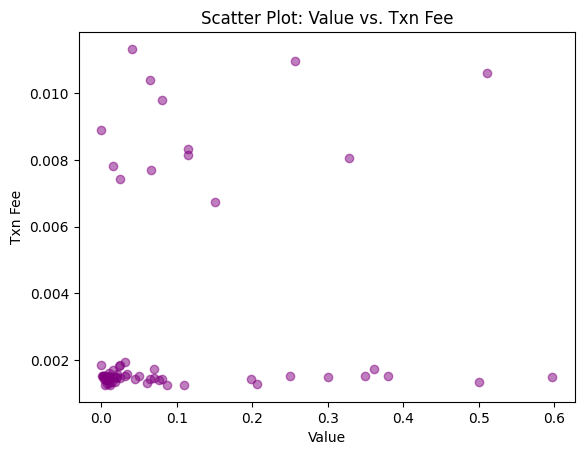

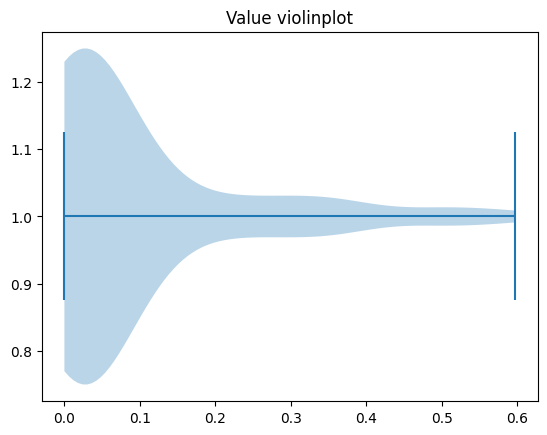

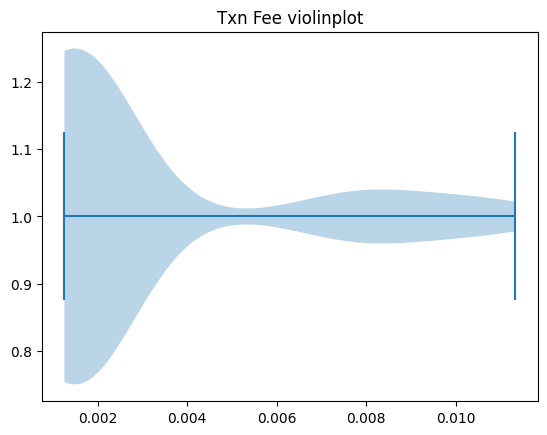

In [47]:
plot_histogram_and_kde(simple_random_sample , "Value" , 50)
plot_histogram_and_kde(simple_random_sample , "Txn Fee" , 50)
plot_box_plot(simple_random_sample , "Value")
plot_box_plot(simple_random_sample , "Txn Fee")
plot_scatter(simple_random_sample , "Value" , "Txn Fee")
plot_violin(simple_random_sample , "Value" )
plot_violin(simple_random_sample , "Txn Fee" )

# Stratified Sampling

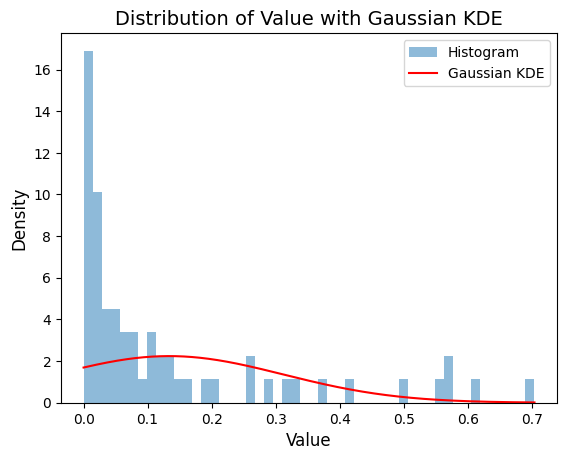

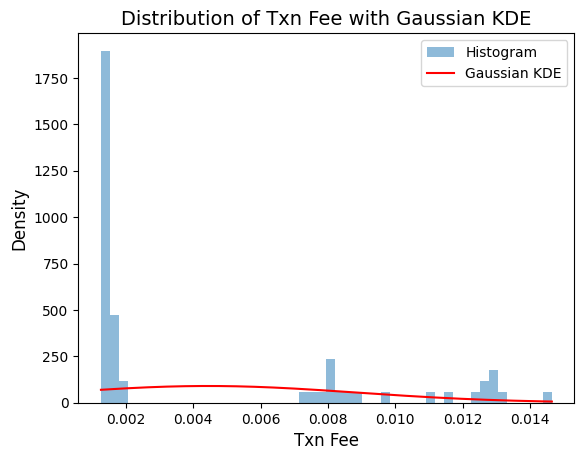

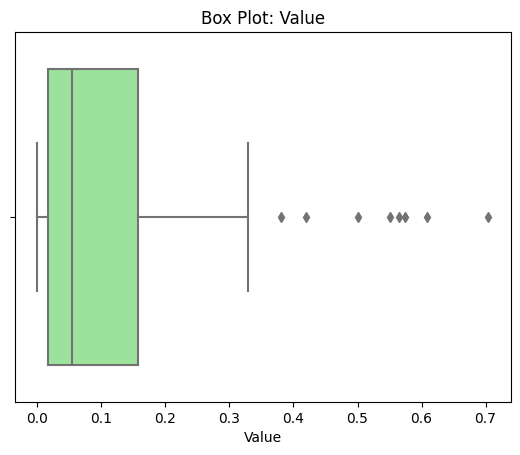

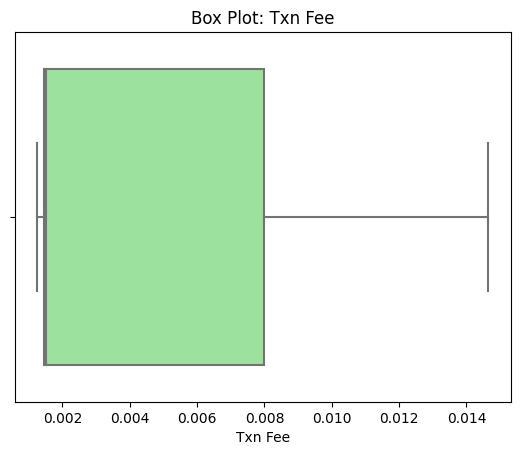

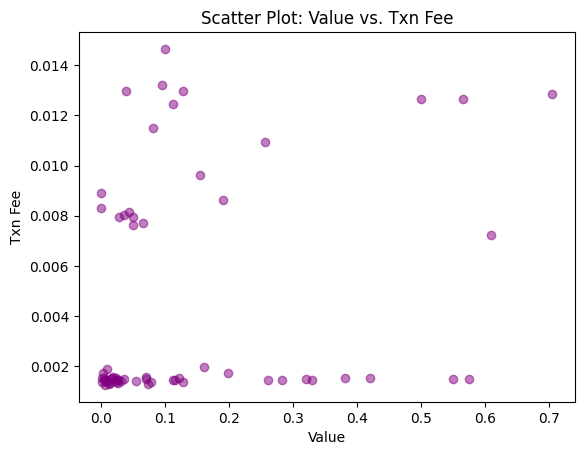

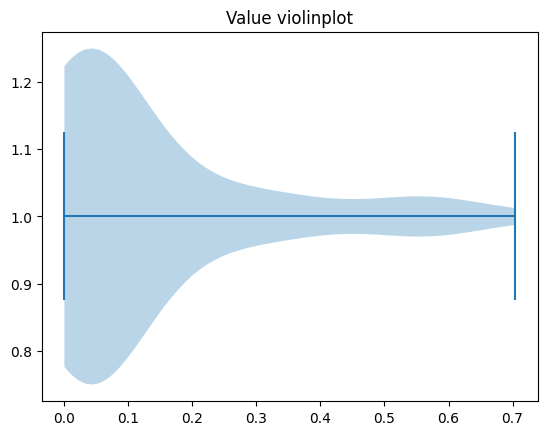

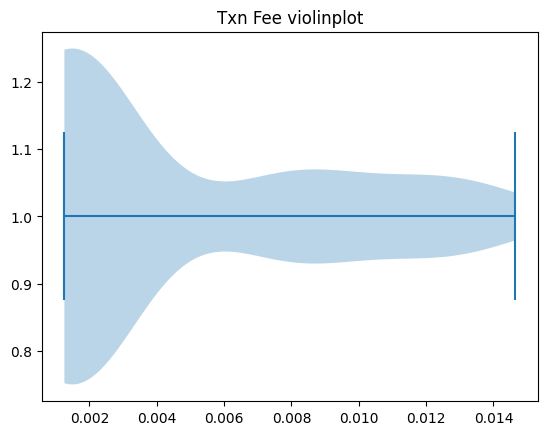

In [48]:
plot_histogram_and_kde(stratified_sample , "Value" , 50)
plot_histogram_and_kde(stratified_sample , "Txn Fee" , 50)
plot_box_plot(stratified_sample , "Value")
plot_box_plot(stratified_sample , "Txn Fee")
plot_scatter(stratified_sample , "Value" , "Txn Fee")
plot_violin(stratified_sample , "Value" )
plot_violin(stratified_sample , "Txn Fee" )

## Questions
### 1. What are some potential limitations when using web scraping for data collection? Specifically, what problems did you face while fetching data from Etherscan? What problems can these limitations cause in your analysis?

1. Website Structure and Changes:
    - Websites can change their structure (HTML layout, CSS classes, etc.) over time. If your scraper relies on specific elements, it may break when the website updates.
   
2. Rate Limiting and IP Blocking:
    - Websites often impose rate limits to prevent abuse. Frequent requests from the same IP address can lead to temporary or permanent blocking.

3. Dynamic Content and JavaScript Rendering:
    - Some websites load data dynamically using JavaScript. Traditional scrapers may not capture this dynamic content.

4. CAPTCHAs and Anti-Scraping Measures:
    - Websites implement CAPTCHAs or other anti-scraping mechanisms to prevent automated access.

5. Data Volume and Scalability:
    - Large-scale scraping can overwhelm your local storage and processing capabilities.

6. Dependency on Third-Party Services:
    - Scrapers rely on external websites. If they go down or change, your scraper may fail.

Website structure is very simple and robust and we didn't face any issue while fetching data from Etherscan.

Impact on Analysis:
- These limitations can lead to incomplete or inaccurate data, affecting the reliability of any analysis based on scraped data.
- Inconsistent data may introduce biases or errors in statistical models or research.
- Legal issues can arise if scraping violates terms of use or privacy rights.

To mitigate these limitations, consider using APIs (if available), respecting rate limits, monitoring changes, and ensuring ethical scraping practices.

### 2. What can make your analysis untrustworthy? What are your solutions?
    Ensuring the trustworthiness of an analysis is crucial for making informed decisions. Here are some factors that can make an analysis untrustworthy and potential solutions:

1. Data Quality Issues:
    - Problem: Poor-quality data can lead to biased or inaccurate results. Incomplete, inconsistent, or erroneous data can undermine trust.
    - Solution:
        - Data Cleaning

2. Sampling Bias:
    - Problem: If the sample used for analysis is not representative of the entire population, the results may not generalize.
    - Solution:
        - Random Sampling: Use random sampling techniques to reduce bias.
        - Stratified Sampling: Stratify the sample to ensure representation across relevant subgroups.

3. Data Scraping Bias:
    - Problem:    Since the scraped sample is related to a short period of time, our data may be biased if there are transactions with big value or too   few transactions. 

4. Communication and Interpretation:
    - Problem: Misleading visualizations or misinterpretation can erode trust.
    - Solution:
        - Clear Communication: Explain findings transparently and avoid jargon.
        - Contextualize Results: Consider practical implications and limitations.


### 3. How did the visualization help you in understanding the data? What could you interpret from the plots.

The visualization of data plays a crucial role in understanding patterns, trends, and relationships within the dataset.

1. Histograms:
    - Histograms provide insights into the distribution of a continuous variable.
    - You can observe whether the data is skewed (left or right), multimodal, or normally distributed.
    - Outliers and central tendencies (mean, median) are evident from the shape.

2. Scatter Plots:
    - Scatter plots reveal relationships between two continuous variables.
    - You can identify correlations (positive, negative, or none) and assess the strength of association.
    - Clusters or patterns may emerge, indicating subgroups or trends.

3. Box Plots (Box-and-Whisker Plots):
    - Box plots summarize the distribution of a continuous variable.
    - You can see the median, quartiles, and potential outliers.
    - Comparing box plots across categories helps detect variations.

4. Violin Plots:
    - Violin plots are a type of visualization that combines aspects of box plots and kernel density estimation (KDE) plots.
    - They provide insights into the distribution of a continuous variable, similar to box plots, but also display the probability density of the data at different values, similar to KDE plots.
    - The shape of the "violin" at each point indicates the density of data at that value, with wider areas indicating higher density.
    - Violin plots are particularly useful for comparing the distributions of multiple groups or categories within a dataset.
    - They offer a more detailed representation of the data compared to box plots alone, as they show the entire distribution rather than just summary statistics.


### 4. How do the two sampling methods differ in their output? Compare these and explain which one is a better fit to the population.

1. Simple Random Sampling:
    - Output :
        - The simple random sampling distribution appears uneven and jagged.
        - It does not accurately represent the population distribution.
    - Suitability:
        - Appropriate when there is little information about the data population.
        - Useful when the population has too many differences to divide into subsets.
        - Works well when there is only one distinct characteristic among the data population.

2. Stratified Sampling:
    - Output :
        - The stratified sampling distribution is smoother and more even compared to simple random sampling.
        - It closely resembles the population distribution.
    - Suitability:
        - Ideal when you want to make precise estimates about the entire population.
        - Ensures proportional representation of subgroups.
        - Useful for research studies and scientific investigations.

3. Comparison:
    - Comparison:
        - Simple random sampling provides a basic sample representing the entire population.
        - Stratified random sampling divides the population into relevant subgroups and samples from each subgroup.
        - Stratified sampling is a better fit for the population because it ensures proportional representation of different subgroups.
        - It provides more accurate estimates and reduces bias compared to simple random sampling.